In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### generate a synthetic data

In [49]:
x=np.arange(0,100,1)
y=0.5*x ## this is the true signal
n=10*np.random.randn(100) ## this is a random noise

### have a quick look at the data

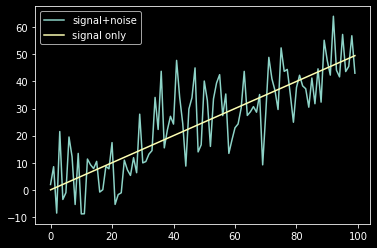

In [50]:
yy=y+n ## add noise to the true signal
plt.plot(x,yy);
plt.plot(x,y)
plt.legend(('signal+noise','signal only'));

### perform linear regression

In [51]:
C=np.cov(x,yy)
a=C[0,1]/C[0,0]
b=np.mean(yy)-a*np.mean(x)
r = C[0,1]/np.sqrt(C[0,0]*C[1,1])
print('regression coefficient is '+str(np.round(a,3)))
print('correlation coefficient is '+str(np.round(r,3)))
print('R2 is '+str(np.round(r*r,3)))

regression coefficient is 0.487
correlation coefficient is 0.817
R2 is 0.668


### let's plot the result

R2 value is 0.14998231066996495


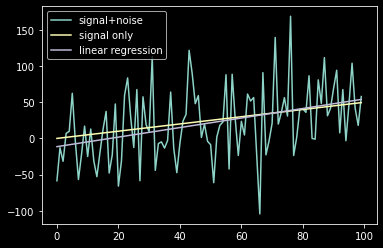

In [19]:
yyy=a*x+b
plt.plot(x,yy) ## yy is signal + noise
plt.plot(x,y)  ## y is signal only
plt.plot(x,yyy)## yyy is the linear regression
plt.legend(('signal+noise','signal only','linear regression'));
# calculate R2 value
R2=C[0,1]**2/C[0,0]/C[1,1]
print('R2 value is '+str(R2))

### pseudo-inverse approach

In [6]:
N=np.size(x)
E=np.ones((N,2))
E[:,0]=x
E[:,1]=1
Q=np.linalg.inv(np.dot(np.transpose(E),E))
ab=np.dot(Q,np.dot(np.transpose(E),yy))

[ 0.50865101 -1.78460312]


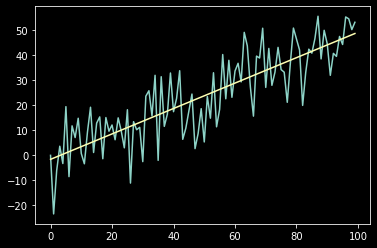

In [7]:
print(ab)
yyy=np.dot(E,ab)
plt.plot(x,yy)
plt.plot(x,yyy);

### a quick look at Atlanta's temperature trend

In [39]:
data=np.genfromtxt('DATA/atlanta_temperature.tsv',delimiter='\t')
year=data[:,0]
temp=np.mean(data[:,1:13],1)
c=np.cov(year,temp)
a=c[0,1]/c[0,0]
R2=c[0,1]**2/c[0,0]/c[1,1]
b=np.mean(temp)-a*np.mean(year)
temp_est=a*year+b
print('Regression coefficient is '+str(np.round(a,3))+' degF/year')
print('R2 is '+str(np.round(R2,3)))

Regression coefficient is 0.016 degF/year
R2 is 0.21


### plot the data 

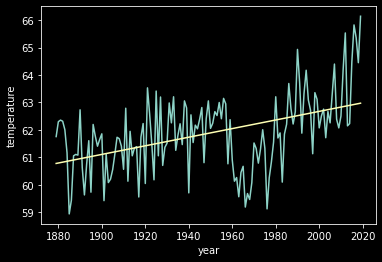

In [41]:
plt.plot(year,temp)
plt.plot(year,temp_est)
plt.xlabel('year')
plt.ylabel('temperature');